In [9]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [10]:
all_df = pd.read_excel("data/titanic3.xls")

In [11]:
cols=['survived','name','pclass' ,'sex', 'age',
       'fare',]
all_df=all_df[cols]

In [12]:
df=all_df.drop(['name'], axis=1)
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)

In [13]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [15]:
df[:4]

,survived,pclass,sex,age,fare
0,1,1,0,29.0000,211.3375
1,1,1,1,0.9167,151.5500
2,0,1,0,2.0000,151.5500
3,0,1,1,30.0000,151.5500


In [19]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

array([[  1.    ,   1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   1.    ,   0.9167, 151.55  ],
       [  0.    ,   1.    ,   0.    ,   2.    , 151.55  ],
       ...,
       [  0.    ,   3.    ,   1.    ,  26.5   ,   7.225 ],
       [  0.    ,   3.    ,   1.    ,  27.    ,   7.225 ],
       [  0.    ,   3.    ,   1.    ,  29.    ,   7.875 ]])

In [7]:
train_Features[355:359]

array([[ 2. ,  0. , 24. , 65. ],
       [ 2. ,  0. , 48. , 65. ],
       [ 2. ,  0. , 55. , 16. ],
       [ 2. ,  1. , 24. , 73.5]])

In [17]:
train_Features[:4]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ]])

In [42]:
train_Label[:4]

array([1., 1., 0., 0.])

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [44]:
model = Sequential()

In [45]:
model.add(Dense(units=40, input_dim=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [46]:
model.add(Dense(units=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [47]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 164       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [50]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 0s - loss: 0.6918 - acc: 0.5785 - val_loss: 0.6847 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6870 - acc: 0.5871 - val_loss: 0.6685 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6726 - acc: 0.5882 - val_loss: 0.6268 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.6401 - acc: 0.6355 - val_loss: 0.5601 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.5986 - acc: 0.7097 - val_loss: 0.5002 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.5647 - acc: 0.7763 - val_loss: 0.4655 - val_acc: 0.7692
Epoch 7/30
 - 0s - loss: 0.5399 - acc: 0.7774 - val_loss: 0.4600 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.5248 - acc: 0.7731 - val_loss: 0.4541 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.5139 - acc: 0.7731 - val_loss: 0.4508 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.5061 - acc: 0.7731 - val_loss: 0.4468 - val_acc: 0.7885
Epoch 11/30
 - 0s - loss: 0.4998 - acc: 0.7710 - val_loss: 0.4497 - val_acc: 0.7885
Epoch 12/30
 - 0s - loss: 0.4947 - acc:

In [51]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

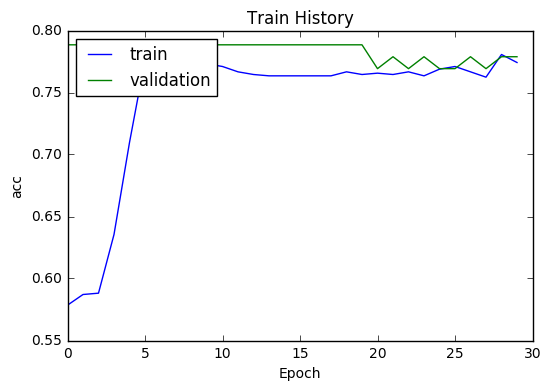

In [52]:
show_train_history(train_history,'acc','val_acc')

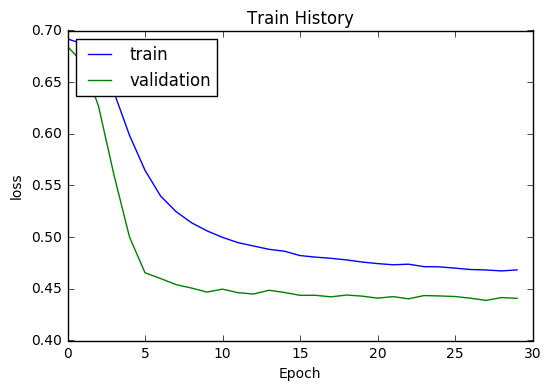

In [53]:
show_train_history(train_history,'loss','val_loss')

In [54]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 42us/step


In [55]:
scores[1]

0.8072727292234247